In [1]:
# imports
import sqlalchemy
from sqlalchemy import create_engine, Column, String, Integer, Numeric, MetaData, Table, type_coerce, ForeignKey, case
from sqlalchemy.orm import mapper, create_session, relationship, aliased, Session
from sqlalchemy.ext.declarative import declarative_base
import csv
from sqlalchemy import case
import numpy as np
from sqlalchemy.ext.automap import automap_base
import matplotlib.pyplot as plt
import sqlalchemy.types as types
import numbers
from sqlalchemy.sql import and_, or_, not_, func
from sqlalchemy.sql import select
import os
import glob
import re
from os.path import isfile
import gsw

import createDBfromDFO_OPDB
%matplotlib inline

In [2]:
# definitions
basepath='/ocean/eolson/MEOPAR/obs/'
basedir=basepath + 'DFOOPDB/'
dbname='DFO_OcProfDB'

In [3]:
# if PRISM.sqlite does not exist, run script to create it
if not isfile(basedir + dbname + '.sqlite'):
    import createDBfromDFO_OPDB
    createDBfromDFO_OPDB.main()
    import processDFO_OPDB
    processDFO_OPDB.main()
    print('done')
else:
    print('file exists')

file exists


In [4]:
Base = automap_base()
engine = create_engine('sqlite:///' + basedir + dbname + '.sqlite', echo = True)
# reflect the tables in salish.sqlite:
Base.prepare(engine, reflect=True)
# mapped classes have been created

2016-01-28 16:52:57,638 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1


INFO:sqlalchemy.engine.base.Engine:SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1


2016-01-28 16:52:57,639 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,639 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1


INFO:sqlalchemy.engine.base.Engine:SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1


2016-01-28 16:52:57,639 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,640 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


INFO:sqlalchemy.engine.base.Engine:SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


2016-01-28 16:52:57,641 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,648 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("CalcsTBL")


INFO:sqlalchemy.engine.base.Engine:PRAGMA table_info("CalcsTBL")


2016-01-28 16:52:57,648 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,652 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("CalcsTBL")


INFO:sqlalchemy.engine.base.Engine:PRAGMA foreign_key_list("CalcsTBL")


2016-01-28 16:52:57,652 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,655 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'CalcsTBL' AND type = 'table'


INFO:sqlalchemy.engine.base.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'CalcsTBL' AND type = 'table'


2016-01-28 16:52:57,655 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,660 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("StationTBL")


INFO:sqlalchemy.engine.base.Engine:PRAGMA table_info("StationTBL")


2016-01-28 16:52:57,660 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,665 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("StationTBL")


INFO:sqlalchemy.engine.base.Engine:PRAGMA foreign_key_list("StationTBL")


2016-01-28 16:52:57,665 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,666 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'StationTBL' AND type = 'table'


INFO:sqlalchemy.engine.base.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'StationTBL' AND type = 'table'


2016-01-28 16:52:57,666 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,669 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("StationTBL")


INFO:sqlalchemy.engine.base.Engine:PRAGMA index_list("StationTBL")


2016-01-28 16:52:57,669 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,672 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("StationTBL")


INFO:sqlalchemy.engine.base.Engine:PRAGMA index_list("StationTBL")


2016-01-28 16:52:57,672 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,675 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'StationTBL' AND type = 'table'


INFO:sqlalchemy.engine.base.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'StationTBL' AND type = 'table'


2016-01-28 16:52:57,676 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,681 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("CalcsTBL")


INFO:sqlalchemy.engine.base.Engine:PRAGMA index_list("CalcsTBL")


2016-01-28 16:52:57,681 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,685 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("CalcsTBL")


INFO:sqlalchemy.engine.base.Engine:PRAGMA index_list("CalcsTBL")


2016-01-28 16:52:57,685 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,688 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'CalcsTBL' AND type = 'table'


INFO:sqlalchemy.engine.base.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'CalcsTBL' AND type = 'table'


2016-01-28 16:52:57,688 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,691 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("JDFLocsTBL")


INFO:sqlalchemy.engine.base.Engine:PRAGMA table_info("JDFLocsTBL")


2016-01-28 16:52:57,691 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,694 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("JDFLocsTBL")


INFO:sqlalchemy.engine.base.Engine:PRAGMA foreign_key_list("JDFLocsTBL")


2016-01-28 16:52:57,695 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,698 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'JDFLocsTBL' AND type = 'table'


INFO:sqlalchemy.engine.base.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'JDFLocsTBL' AND type = 'table'


2016-01-28 16:52:57,698 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,701 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("JDFLocsTBL")


INFO:sqlalchemy.engine.base.Engine:PRAGMA index_list("JDFLocsTBL")


2016-01-28 16:52:57,702 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,704 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("JDFLocsTBL")


INFO:sqlalchemy.engine.base.Engine:PRAGMA index_list("JDFLocsTBL")


2016-01-28 16:52:57,705 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,707 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'JDFLocsTBL' AND type = 'table'


INFO:sqlalchemy.engine.base.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'JDFLocsTBL' AND type = 'table'


2016-01-28 16:52:57,708 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,711 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("ObsTBL")


INFO:sqlalchemy.engine.base.Engine:PRAGMA table_info("ObsTBL")


2016-01-28 16:52:57,712 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,719 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("ObsTBL")


INFO:sqlalchemy.engine.base.Engine:PRAGMA foreign_key_list("ObsTBL")


2016-01-28 16:52:57,720 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,723 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'ObsTBL' AND type = 'table'


INFO:sqlalchemy.engine.base.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'ObsTBL' AND type = 'table'


2016-01-28 16:52:57,723 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,728 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("ObsTBL")


INFO:sqlalchemy.engine.base.Engine:PRAGMA index_list("ObsTBL")


2016-01-28 16:52:57,729 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,732 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("ObsTBL")


INFO:sqlalchemy.engine.base.Engine:PRAGMA index_list("ObsTBL")


2016-01-28 16:52:57,733 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,736 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'ObsTBL' AND type = 'table'


INFO:sqlalchemy.engine.base.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'ObsTBL' AND type = 'table'


2016-01-28 16:52:57,736 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,741 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("StationTBL")


INFO:sqlalchemy.engine.base.Engine:PRAGMA table_info("StationTBL")


2016-01-28 16:52:57,741 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,744 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("StationTBL")


INFO:sqlalchemy.engine.base.Engine:PRAGMA foreign_key_list("StationTBL")


2016-01-28 16:52:57,745 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,745 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'StationTBL' AND type = 'table'


INFO:sqlalchemy.engine.base.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'StationTBL' AND type = 'table'


2016-01-28 16:52:57,745 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,748 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("StationTBL")


INFO:sqlalchemy.engine.base.Engine:PRAGMA index_list("StationTBL")


2016-01-28 16:52:57,749 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,752 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("StationTBL")


INFO:sqlalchemy.engine.base.Engine:PRAGMA index_list("StationTBL")


2016-01-28 16:52:57,752 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2016-01-28 16:52:57,755 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'StationTBL' AND type = 'table'


INFO:sqlalchemy.engine.base.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'StationTBL' AND type = 'table'


2016-01-28 16:52:57,755 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


In [5]:
Station=Base.classes.StationTBL
Obs=Base.classes.ObsTBL
JDFLocs=Base.classes.JDFLocsTBL
Calcs=Base.classes.CalcsTBL
session = create_session(bind = engine, autocommit = False, autoflush = True)

In [6]:
Sal=case([(Obs.Salinity_Bottle!=None, Obs.Salinity_Bottle)], else_=
         case([(Obs.Salinity_T0_C0!=None, Obs.Salinity_T0_C0)], else_=
         case([(Obs.Salinity_T1_C1!=None, Obs.Salinity_T1_C1)], else_=
         case([(Obs.Salinity!=None, Obs.Salinity)], else_=
         case([(Obs.Salinity__Unknown!=None, Obs.Salinity__Unknown)], else_=Obs.Salinity__Pre1978)
        ))))
SalUnits=case([(Obs.Salinity_Bottle!=None, Obs.Salinity_Bottle_units)], else_=
         case([(Obs.Salinity_T0_C0!=None, Obs.Salinity_T0_C0_units)], else_=
         case([(Obs.Salinity_T1_C1!=None, Obs.Salinity_T1_C1_units)], else_=
         case([(Obs.Salinity!=None, Obs.Salinity_units)], else_=
         case([(Obs.Salinity__Unknown!=None, Obs.Salinity__Unknown_units)], else_=Obs.Salinity__Pre1978_units)
        ))))
SalFlag=case([(Obs.Salinity_Bottle!=None, Obs.Flag_Salinity_Bottle)], else_=
         case([(Obs.Salinity_T0_C0!=None, Obs.Flag_Salinity)], else_=
         case([(Obs.Salinity_T1_C1!=None, Obs.Flag_Salinity)], else_=
         case([(Obs.Salinity!=None, Obs.Flag_Salinity)], else_=
         case([(Obs.Salinity__Unknown!=None, Obs.Flag_Salinity)], else_=Obs.Quality_Flag_Sali)
        ))))
SA=case([(Calcs.Salinity_Bottle_SA!=None, Calcs.Salinity_Bottle_SA)], else_=
         case([(Calcs.Salinity_T0_C0_SA!=None, Calcs.Salinity_T0_C0_SA)], else_=
         case([(Calcs.Salinity_T1_C1_SA!=None, Calcs.Salinity_T1_C1_SA)], else_=
         case([(Calcs.Salinity_SA!=None, Calcs.Salinity_SA)], else_=
         case([(Calcs.Salinity__Unknown_SA!=None, Calcs.Salinity__Unknown_SA)], else_=Calcs.Salinity__Pre1978_SA)
        ))))

In [7]:
NO=case([(Obs.Nitrate_plus_Nitrite!=None, Obs.Nitrate_plus_Nitrite)], else_=Obs.Nitrate)
NOUnits=case([(Obs.Nitrate_plus_Nitrite!=None, Obs.Nitrate_plus_Nitrite_units)], else_=Obs.Nitrate_units)
NOFlag=case([(Obs.Nitrate_plus_Nitrite!=None, Obs.Flag_Nitrate_plus_Nitrite)], else_=Obs.Flag_Nitrate)
# Obs.Quality_Flag_Nitr does not match any nitrate obs
# ISUS not included in this NO; test separately

In [8]:
Tem=case([(Obs.Temperature!=None, Obs.Temperature)], else_=
         case([(Obs.Temperature_Primary!=None, Obs.Temperature_Primary)], else_=
         case([(Obs.Temperature_Secondary!=None, Obs.Temperature_Secondary)], else_=Obs.Temperature_Reversing)))
TemUnits=case([(Obs.Temperature!=None, Obs.Temperature_units)], else_=
         case([(Obs.Temperature_Primary!=None, Obs.Temperature_Primary_units)], else_=
         case([(Obs.Temperature_Secondary!=None, Obs.Temperature_Secondary_units)], 
              else_=Obs.Temperature_Reversing_units)))
TemFlag=Obs.Quality_Flag_Temp

In [9]:
Ox=case([(Calcs.Oxygen_umolL!=None, Calcs.Oxygen_umolL)], else_=Calcs.Oxygen_Dissolved_umolL)
OxFlag=case([(Calcs.Oxygen_umolL!=None, Obs.Quality_Flag_Oxyg)], else_=Obs.Flag_Oxygen_Dissolved)

In [10]:
Press=case([(Obs.Pressure!=None, Obs.Pressure)], else_=Obs.Pressure_Reversing)

In [30]:
# TS diagram based on example code, but using SA and CT
q=session.query(JDFLocs.ObsID, Obs.ID, SA, Tem, Press).select_from(Obs).\
        join(JDFLocs,JDFLocs.ObsID==Obs.ID).join(Calcs,Calcs.ObsID==Obs.ID).filter(and_(
            SA!=None,
            SA>0,
            SA<50,
            Tem!=None,
            Press!=None)).all()
ID1=[]
ID2=[]
S_A=[]
TC=[]
P=[]
for ID1x, ID2x, S_Ax, Tx, Px in q:
    S_A.append(float(S_Ax))
    TC.append(gsw.CT_from_t(S_Ax,Tx,Px))
S_A=np.array(S_A)
TC=np.array(TC)

2016-01-28 17:19:19,396 INFO sqlalchemy.engine.base.Engine SELECT "JDFLocsTBL"."ObsID" AS "JDFLocsTBL_ObsID", "ObsTBL"."ID" AS "ObsTBL_ID", CASE WHEN ("CalcsTBL"."Salinity_Bottle_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity_Bottle_SA" ELSE CASE WHEN ("CalcsTBL"."Salinity_T0_C0_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity_T0_C0_SA" ELSE CASE WHEN ("CalcsTBL"."Salinity_T1_C1_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity_T1_C1_SA" ELSE CASE WHEN ("CalcsTBL"."Salinity_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity_SA" ELSE CASE WHEN ("CalcsTBL"."Salinity__Unknown_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity__Unknown_SA" ELSE "CalcsTBL"."Salinity__Pre1978_SA" END END END END END AS anon_1, CASE WHEN ("ObsTBL"."Temperature" IS NOT NULL) THEN "ObsTBL"."Temperature" ELSE CASE WHEN ("ObsTBL"."Temperature_Primary" IS NOT NULL) THEN "ObsTBL"."Temperature_Primary" ELSE CASE WHEN ("ObsTBL"."Temperature_Secondary" IS NOT NULL) THEN "ObsTBL"."Temperature_Secondary" ELSE "ObsTBL"."Temperature_Reversing" END END EN

INFO:sqlalchemy.engine.base.Engine:SELECT "JDFLocsTBL"."ObsID" AS "JDFLocsTBL_ObsID", "ObsTBL"."ID" AS "ObsTBL_ID", CASE WHEN ("CalcsTBL"."Salinity_Bottle_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity_Bottle_SA" ELSE CASE WHEN ("CalcsTBL"."Salinity_T0_C0_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity_T0_C0_SA" ELSE CASE WHEN ("CalcsTBL"."Salinity_T1_C1_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity_T1_C1_SA" ELSE CASE WHEN ("CalcsTBL"."Salinity_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity_SA" ELSE CASE WHEN ("CalcsTBL"."Salinity__Unknown_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity__Unknown_SA" ELSE "CalcsTBL"."Salinity__Pre1978_SA" END END END END END AS anon_1, CASE WHEN ("ObsTBL"."Temperature" IS NOT NULL) THEN "ObsTBL"."Temperature" ELSE CASE WHEN ("ObsTBL"."Temperature_Primary" IS NOT NULL) THEN "ObsTBL"."Temperature_Primary" ELSE CASE WHEN ("ObsTBL"."Temperature_Secondary" IS NOT NULL) THEN "ObsTBL"."Temperature_Secondary" ELSE "ObsTBL"."Temperature_Reversing" END END END AS anon_2, CASE WHEN (

2016-01-28 17:19:19,397 INFO sqlalchemy.engine.base.Engine (0, 50)


INFO:sqlalchemy.engine.base.Engine:(0, 50)


/home/eolson/anaconda3/envs/teos10/lib/python3.4/site-packages/ipykernel/__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


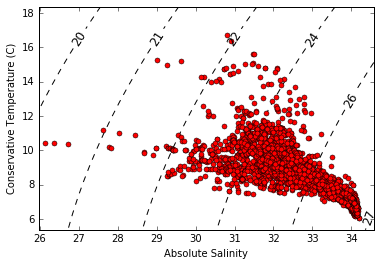

In [32]:
# TS diagram example:

# Create variables with user-friendly names
temp  = TC
salt  = S_A
 
# Figure out boudaries (mins and maxs)
smin = salt.min() - (0.01 * salt.min())
smax = salt.max() + (0.01 * salt.max())
tmin = temp.min() - (0.1 * temp.max())
tmax = temp.max() + (0.1 * temp.max())
 
# Calculate how many gridcells we need in the x and y dimensions
xdim = round((smax-smin)/0.1+1,0)
ydim = round((tmax-tmin)+1,0)
 
# Create empty grid of zeros
dens = np.zeros((ydim,xdim))
 
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(1,ydim-1,ydim)+tmin
si = np.linspace(1,xdim-1,xdim)*0.1+smin
 
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        dens[j,i]=gsw.rho(si[i],gsw.t_from_CT(si[i],ti[j],0),0)
 
# Substract 1000 to convert to sigma-t
dens = dens - 1000
 
# Plot data ***********************************************
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
CS = plt.contour(si,ti,dens, linestyles='dashed', colors='k')
plt.clabel(CS, fontsize=12, inline=1, fmt='%1.0f') # Label every second level
 
ax1.plot(salt,temp,'or',markersize=5)
 
ax1.set_xlabel('Absolute Salinity')
ax1.set_ylabel('Conservative Temperature (C)')

In [28]:
q=session.query(JDFLocs.ObsID, Obs.ID, SA, Sal, Tem, Press).select_from(Obs).\
        join(JDFLocs,JDFLocs.ObsID==Obs.ID).join(Calcs,Calcs.ObsID==Obs.ID).filter(and_(
            SA!=None,
            Tem!=None,
            Press!=None)).filter(SA>40).all()
for row in q:
    print(row)

2016-01-28 17:15:11,216 INFO sqlalchemy.engine.base.Engine SELECT "JDFLocsTBL"."ObsID" AS "JDFLocsTBL_ObsID", "ObsTBL"."ID" AS "ObsTBL_ID", CASE WHEN ("CalcsTBL"."Salinity_Bottle_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity_Bottle_SA" ELSE CASE WHEN ("CalcsTBL"."Salinity_T0_C0_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity_T0_C0_SA" ELSE CASE WHEN ("CalcsTBL"."Salinity_T1_C1_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity_T1_C1_SA" ELSE CASE WHEN ("CalcsTBL"."Salinity_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity_SA" ELSE CASE WHEN ("CalcsTBL"."Salinity__Unknown_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity__Unknown_SA" ELSE "CalcsTBL"."Salinity__Pre1978_SA" END END END END END AS anon_1, CASE WHEN ("ObsTBL"."Salinity_Bottle" IS NOT NULL) THEN "ObsTBL"."Salinity_Bottle" ELSE CASE WHEN ("ObsTBL"."Salinity_T0_C0" IS NOT NULL) THEN "ObsTBL"."Salinity_T0_C0" ELSE CASE WHEN ("ObsTBL"."Salinity_T1_C1" IS NOT NULL) THEN "ObsTBL"."Salinity_T1_C1" ELSE CASE WHEN ("ObsTBL"."Salinity" IS NOT NULL) THEN "ObsTBL"."

INFO:sqlalchemy.engine.base.Engine:SELECT "JDFLocsTBL"."ObsID" AS "JDFLocsTBL_ObsID", "ObsTBL"."ID" AS "ObsTBL_ID", CASE WHEN ("CalcsTBL"."Salinity_Bottle_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity_Bottle_SA" ELSE CASE WHEN ("CalcsTBL"."Salinity_T0_C0_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity_T0_C0_SA" ELSE CASE WHEN ("CalcsTBL"."Salinity_T1_C1_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity_T1_C1_SA" ELSE CASE WHEN ("CalcsTBL"."Salinity_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity_SA" ELSE CASE WHEN ("CalcsTBL"."Salinity__Unknown_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity__Unknown_SA" ELSE "CalcsTBL"."Salinity__Pre1978_SA" END END END END END AS anon_1, CASE WHEN ("ObsTBL"."Salinity_Bottle" IS NOT NULL) THEN "ObsTBL"."Salinity_Bottle" ELSE CASE WHEN ("ObsTBL"."Salinity_T0_C0" IS NOT NULL) THEN "ObsTBL"."Salinity_T0_C0" ELSE CASE WHEN ("ObsTBL"."Salinity_T1_C1" IS NOT NULL) THEN "ObsTBL"."Salinity_T1_C1" ELSE CASE WHEN ("ObsTBL"."Salinity" IS NOT NULL) THEN "ObsTBL"."Salinity" ELSE CASE WHEN

2016-01-28 17:15:11,216 INFO sqlalchemy.engine.base.Engine (40,)


INFO:sqlalchemy.engine.base.Engine:(40,)


(6334, 6334, 54.82919511370604, 54.5674, 10.6817, 27.6)


In [29]:
q=session.query(JDFLocs.ObsID, Obs.sourceFile, Obs.Depth, SA, Obs.Salinity_Bottle, Obs.Salinity, Obs.Salinity_T0_C0, 
               Obs.Salinity_T1_C1, Obs.Salinity__Pre1978, Obs.Salinity__Unknown).select_from(Obs).\
        join(JDFLocs,JDFLocs.ObsID==Obs.ID).join(Calcs,Calcs.ObsID==Obs.ID).filter(and_(
            SA!=None,
            Tem!=None,
            Press!=None)).filter(SA>40).all()
for row in q:
    print(row)

2016-01-28 17:15:13,812 INFO sqlalchemy.engine.base.Engine SELECT "JDFLocsTBL"."ObsID" AS "JDFLocsTBL_ObsID", "ObsTBL"."sourceFile" AS "ObsTBL_sourceFile", "ObsTBL"."Depth" AS "ObsTBL_Depth", CASE WHEN ("CalcsTBL"."Salinity_Bottle_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity_Bottle_SA" ELSE CASE WHEN ("CalcsTBL"."Salinity_T0_C0_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity_T0_C0_SA" ELSE CASE WHEN ("CalcsTBL"."Salinity_T1_C1_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity_T1_C1_SA" ELSE CASE WHEN ("CalcsTBL"."Salinity_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity_SA" ELSE CASE WHEN ("CalcsTBL"."Salinity__Unknown_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity__Unknown_SA" ELSE "CalcsTBL"."Salinity__Pre1978_SA" END END END END END AS anon_1, "ObsTBL"."Salinity_Bottle" AS "ObsTBL_Salinity_Bottle", "ObsTBL"."Salinity" AS "ObsTBL_Salinity", "ObsTBL"."Salinity_T0_C0" AS "ObsTBL_Salinity_T0_C0", "ObsTBL"."Salinity_T1_C1" AS "ObsTBL_Salinity_T1_C1", "ObsTBL"."Salinity__Pre1978" AS "ObsTBL_Salinity__Pre1978", "

INFO:sqlalchemy.engine.base.Engine:SELECT "JDFLocsTBL"."ObsID" AS "JDFLocsTBL_ObsID", "ObsTBL"."sourceFile" AS "ObsTBL_sourceFile", "ObsTBL"."Depth" AS "ObsTBL_Depth", CASE WHEN ("CalcsTBL"."Salinity_Bottle_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity_Bottle_SA" ELSE CASE WHEN ("CalcsTBL"."Salinity_T0_C0_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity_T0_C0_SA" ELSE CASE WHEN ("CalcsTBL"."Salinity_T1_C1_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity_T1_C1_SA" ELSE CASE WHEN ("CalcsTBL"."Salinity_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity_SA" ELSE CASE WHEN ("CalcsTBL"."Salinity__Unknown_SA" IS NOT NULL) THEN "CalcsTBL"."Salinity__Unknown_SA" ELSE "CalcsTBL"."Salinity__Pre1978_SA" END END END END END AS anon_1, "ObsTBL"."Salinity_Bottle" AS "ObsTBL_Salinity_Bottle", "ObsTBL"."Salinity" AS "ObsTBL_Salinity", "ObsTBL"."Salinity_T0_C0" AS "ObsTBL_Salinity_T0_C0", "ObsTBL"."Salinity_T1_C1" AS "ObsTBL_Salinity_T1_C1", "ObsTBL"."Salinity__Pre1978" AS "ObsTBL_Salinity__Pre1978", "ObsTBL"."Salinity__Unkno

2016-01-28 17:15:13,813 INFO sqlalchemy.engine.base.Engine (40,)


INFO:sqlalchemy.engine.base.Engine:(40,)


(6334, 'UBC EO data request 20160113 a/2010-21-0009.che', None, 54.82919511370604, None, None, 54.5674, None, None, None)


In [ ]:
qry=session.query(Obs.Quality_Flag_Sali, Obs.Salinity, Obs.Salinity_Bottle, Obs.Salinity_T0_C0, 
                  Obs.Salinity_T1_C1, Obs.Salinity__Pre1978, Obs.Salinity__Unknown, Obs.sourceFile
                 ).filter(and_(
            Obs.Quality_Flag_Sali!=None,
            Obs.Salinity__Pre1978==None
            )).all()
for row in qry:
    print('%5s %5s %13s %5s %13s %5s %5s %5s' % row)

In [ ]:
qJDFLoc=session.query(Obs.ID, Station.ID).filter(
    and_(
        Station.Lat > 48.2,
        Station.Lat < 48.8,
        Station.Lon > -125.2,
        Station.Lon < -124.2
        )).join(Station, Obs.StationTBLID==Station.ID)
print(qJDFLoc.count())

In [12]:
test=session.query(JDFLocs).count()
print(test)

InvalidRequestError: SQL expression, column, or mapped entity expected - got '<class '__main__.JDFLocs'>'

In [ ]:
qdata=session.query(JDFLocs.ObsID, Station.Lat, Station.Lon, Obs.Depth, Obs.Pressure, Tem, Sal, NO, 
            Oxy_mLL).join(Obs, JDFLocs.ObsID==Obs.ID).join(Station, Obs.StationTBLID==Station.ID).filter(and_(
                        Obs.Depth>50,
                        Tem!=None, 
                        Sal!=None,
                        NO!=None,
                        Oxy_mLL!=None)
                        )
print(qdata.count())

In [ ]:
Lat=[]
Lon=[]
z=[]
P=[]
T=[]
S=[]
N=[]
O=[]
for row in qdata.all():
    Lat.append(row[1])
    Lon.append(row[2])
    z.append(row[3])
    P.append(row[4])
    T.append(float(row[5]))
    S.append(float(row[6]))
    N.append(float(row[7]))
    O.append(float(row[8]))

In [ ]:
print(T[0])

In [ ]:
N=np.array(N)
S=np.array(S)
T=np.array(T)
O=np.array(O)

In [ ]:
plt.plot(S,N,'.')
plt.xlabel('S')
plt.ylabel('N')

In [ ]:
plt.plot(T,N,'.')
plt.xlabel('T')
plt.ylabel('N')

In [ ]:
plt.plot(O,N,'.')
plt.xlabel('O')
plt.ylabel('N')

In [ ]:
a=np.vstack([T,S,O,np.ones(len(T))]).T
m = np.linalg.lstsq(a,N)[0]
mT, mS, mO, mC = m
print(mT, mS, mO, mC)

In [ ]:
plt.plot(N,np.dot(a,m),'.')
plt.xlabel('NO')
plt.ylabel('NO, linear model')
SSE=np.dot((NO-np.dot(a,m)),(NO-np.dot(a,m)).T)
plt.title('Linear Model: NO(T,S)')
print('SSE=', SSE)
plt.plot(np.array([0,40]), np.array([0, 40]),'r-')

In [ ]:
session.close()
engine.dispose()